# AA 273: Homework 3
Ramon Iglesias

## Q1

**1.a)** 

First, not that $x,y$ are statistically independent of $w$. 

$$
p(x,y,w) = p(x,y | w) p(w)
$$

But, from the problem statement,

$$ 
p(x,w,y) = p(x,y) p(w)
$$

thus, 
$$
p(x,y | w)  = p(x,y).
$$

Now, we compute the covariance by leveraging this property:

\begin{align}
cov(X,W | Y)  & = E[XW | Y] - E[X | Y] E[W|Y] &\\
 &= E[XW | Y] - \mu_{X|Y} \mu_{W} & \text{(by conditional independence)}\\
 &= E_{W | Y}[E_{XW | W,Y}[XW | W,Y] ] - \mu_{X|Y} \mu_{W}  & \text{(by law of total expectation)}\\
 &= E_{W | Y}[W E_{X | W,Y}[X | W,Y] ] - \mu_{X|Y} \mu_{W}& \\
 &= E_{W | Y}[W E_{X | Y}[X | Y] ] - \mu_{X|Y} \mu_{W} & \text{(by conditional independence)}\\
 &= E_{W | Y}[W \mu_{X|Y}] - \mu_{X|Y} \mu_{W} &\\
 &= E_{W}[W] \mu_{X|Y} - \mu_{X|Y} \mu_{W}  & \text{(by conditional independence)}\\
 &= \mu_{W} \mu_{X|Y} - \mu_{X|Y} \mu_{W} = 0 &\\
 \end{align}


**1.b)** 


\begin{align}
E[(X - \mu_{t|t}) W^T | Y] & = E[XW^T | Y] - E[\mu_{t|t} W^T | Y]\\
&= E[XW^T | Y] - \mu_{t|t} \mu_{W}^T \\
&= E_{W|Y} [ E_{XW | Y}[ XW^T | Y] ] - \mu_{t|t} \mu_{W}^T \\
&= E_{W|Y} [ E_{X | Y}[ X | Y] W^T ] - \mu_{t|t} \mu_{W}^T \\
&= E_{W|Y} [ \mu_{X|Y} W^T ] - \mu_{t|t} \mu_{W}^T \\
&= \mu_{X|Y} \mu_{W}^T  - \mu_{t|t} \mu_{W}^T \\
&= \mu_{t|t} \mu_{W}^T  - \mu_{t|t} \mu_{W}^T = 0 \\
\end{align}


where for convenience we abbreviate $X := X_{t}$, and $Y := Y_{1:t}$

## Q2

**2.a)** Find the system matrices $A,B,C$.

The system can be summarized as follows:

$$
x_{t+1} = A x_{t} + B u_{t} + w_t\,, \\
y_{t+1} = C x_{t} + v_t\,,
$$

where

$$
x_t = 
\begin{bmatrix}
    p_{1,t} \\
    p_{2,t} \\
    s_{1,t} \\
    s_{2,t} \\
\end{bmatrix}\,,
$$

$$
u_t = 
\begin{bmatrix}
    u_{1,t} \\
    u_{2,t} \\
\end{bmatrix}\,,
$$

$$
A = 
\begin{bmatrix}
    1 & 0 & \delta t  & 0 \\
    0 & 1 & 0  & \delta t \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0  & 1
\end{bmatrix}
$$

$$
B = 
\begin{bmatrix}
    0 & 0 \\
    0 & 0 \\
    \delta t & 0 \\
    0 & \delta t
\end{bmatrix}
$$

$$
Q =
\begin{bmatrix}
    0 & 0 & 0  & 0 \\
    0 & 0 & 0  & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0  & 1
\end{bmatrix}\,.
$$

$$
C = 
\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0
\end{bmatrix}
$$



**2.b)** Simulate trajectory

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
% matplotlib inline

In [107]:
def gen_noise(size, cov):
    mean = np.zeros(size)
    return multivariate_normal.rvs(mean = mean, cov = cov)

class LTISystem:
    def __init__(self, A, B, C, D, Q, R, x_0, control_func, t_0, dt):
        self.A = A
        self.B = B
        self.C = C
        self.D = D
        self.Q = Q
        self.R = R
        self.x = x_0
        self.control_func = control_func
        self.t = t_0
        self.dt = dt
        return
    
    def forward_step(self):
        w = gen_noise(self.Q.shape[1], self.Q)
        u = self.control_func(self.x, self.t)
        self.x = np.dot(self.A, self.x) + np.dot(self.B, u) + w
        self.t += self.dt
        y = self.get_measurement(u)
        return u, y
    
    def get_measurement(self, u):
        y = np.dot(self.C, self.x) + np.dot(self.D, u)
        v = gen_noise(y.shape[0], self.R)
        return y + v

In [421]:
dt = 1.
t_0 = 0.
x_0 = np.array([
    1000.,
    0.,
    0.,
    50.
])

def get_action(x,t):
    return -2.5 * np.array([np.cos(0.05 * t), np.sin(0.05 * t)])

A = np.array([
    [1., 0., dt, 0.],
    [0., 1., 0., dt],
    [0., 0., 1., 0.],
    [0., 0., 0., 1.]
])


B = np.array([
    [0., 0.],
    [0., 0.],
    [dt, 0.],
    [0., dt]
])

C = np.array([
    [1., 0., 0., 0.],
    [0., 1., 0., 0.]
])

Q = np.array([
    [0.,0.,0.,0.],
    [0.,0.,0.,0.],
    [0.,0.,1.,0.],
    [0.,0.,0.,1.]
])

R = np.array([
    [9., 0.],
    [0., 9.]
])

D = np.zeros((2,2))

nsteps = 100

In [422]:
system = LTISystem(A, B, C, D, Q, R, x_0, get_action, t_0, dt)

In [423]:
measurements = np.zeros((nsteps, C.shape[0]))
real_trajectory = np.zeros((nsteps, C.shape[0]))
for i in range(nsteps):
    u, y = system.forward_step()
    measurements[i,:] = y
    real_trajectory[i,:] = system.x[:2]

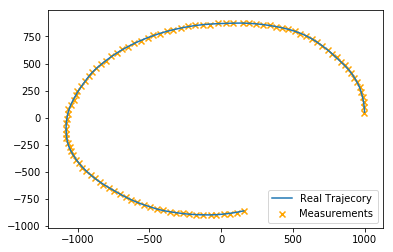

In [424]:
plt.plot(real_trajectory[:,0],
         real_trajectory[:,1], 
         label = 'Real Trajecory')
plt.scatter(measurements[:,0],
            measurements[:,1], 
            marker='x', 
            color = 'orange', 
            label = 'Measurements')
plt.legend()

## Q3

**3.a)** The new equations remain unchanged, the only difference is how we model the noise in $w_t$. That is,

$$
w_t \sim \mathcal{N}(\mu_w,\,Q)\,,
$$

where $\mu_t$ is zero everywhere, and 

$$
Q =
\begin{bmatrix}
    0 & 0 & 0  & 0 \\
    0 & 0 & 0  & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0  & 1
\end{bmatrix}\,.
$$

In other words, $w_t$ has zero mean and zero variance (i.e. always zero) in the position variables.

**3.b)**

In [425]:
class KalmanFilter:
    def __init__(self, lti_system, mu_0, sigma_0):
        self.A = lti_system.A
        self.B = lti_system.B
        self.C = lti_system.C
        self.Q = lti_system.Q
        self.R = lti_system.R
        self.D = lti_system.D
        self.mu = mu_0
        self.sigma = sigma_0
        return
    
    def predict(self, u):
        self.mu = np.dot(self.A, self.mu) + np.dot(self.B, u)
        self.sigma = np.dot(self.A, np.dot(self.sigma,self.A.T)) + self.Q
        return self.mu, self.sigma
    
    def update(self, y,u):
        term3 = y - (np.dot(self.C, self.mu) + np.dot(self.D, u))
        term2 = np.linalg.inv(np.dot(self.C, np.dot(self.sigma, self.C.T)) + self.R)
        term1 = np.dot(self.sigma, self.C.T)
        term4 = np.dot(self.C, self.sigma)
        self.mu = self.mu + np.dot(term1, np.dot(term2, term3))
        self.sigma = self.sigma - np.dot(term1, np.dot(term2, term4))
        return self.mu, self.sigma

In [427]:
def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

In [468]:
system = LTISystem(A, B, C, D, Q, R, x_0, get_action, t_0, dt)
mu_0 = np.array([
    1500.,
    100.,
    0.,
    55.
])

sigma_0 = np.array([
    [250000., 0., 0., 0.],
    [0., 250000., 0., 0.],
    [0., 0., 1., 0.],
    [0., 0., 0., 1.],
])

kfilter = KalmanFilter(system, mu_0, sigma_0)

In [469]:
measurements = np.zeros((nsteps, C.shape[0]))
real_trajectory = np.zeros((nsteps, x_0.shape[0]))
mus = np.zeros((nsteps+1, x_0.shape[0]))
sigmas = np.zeros((nsteps+1, x_0.shape[0], x_0.shape[0]))
mus[0, :] = mu_0
sigmas[0, :, :] = sigma_0
for i in range(nsteps):
    u, y = system.forward_step()
    measurements[i,:] = y
    real_trajectory[i,:] = system.x
    mu, sigma = kfilter.update(y, u)
    mu, sigma = kfilter.predict(u)
    mus[i+1, :] = mu
    sigmas[i+1, :, :] = sigma

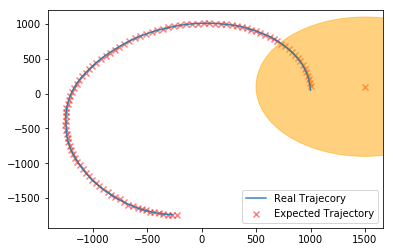

In [470]:
plt.plot(real_trajectory[:,0],
         real_trajectory[:,1], 
         label = 'Real Trajecory', alpha = 0.9)
plt.scatter(mus[:,0],
            mus[:,1], 
            marker='x', 
            color = 'red', 
            label = 'Expected Trajectory', alpha=0.5)
for i in range(nsteps):
    #plot_ellipsis(mus[i,:2,None], sigmas[i,:2,:2], P = 0.95, color = 'orange', alpha=0.1)
    plot_cov_ellipse(sigmas[i,:2,:2], mus[i,:2], color = 'orange', alpha = 0.5)
plt.legend()

**3.c)** Velocity trajectory

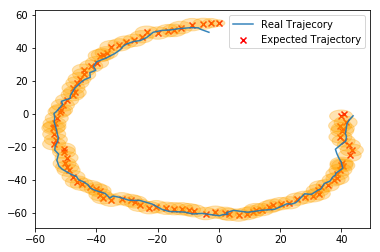

In [474]:
plt.plot(real_trajectory[:,2],
         real_trajectory[:,3], 
         label = 'Real Trajecory', alpha = 0.9)
plt.scatter(mus[:,2],
            mus[:,3], 
            marker='x', 
            color = 'red', 
            label = 'Expected Trajectory')
for i in range(nsteps):
    #plot_ellipsis(mus[i,:2,None], sigmas[i,:2,:2], P = 0.95, color = 'orange', alpha=0.1)
    plot_cov_ellipse(sigmas[i,2:,2:], mus[i,2:], color = 'orange', alpha = 0.3)
plt.legend()

## Q4

In [449]:
C4 = np.array([
    [0., 0., 1., 0.],
    [0., 0., 0., 1.]
])

In [476]:
system = LTISystem(A, B, C4, D, Q, R, x_0, get_action, t_0, dt)
mu_0 = np.array([
    1000.,
    0.,
    0.,
    50.
])

sigma_0 = np.array([
    [1., 0., 0., 0.],
    [0., 1., 0., 0.],
    [0., 0., 1., 0.],
    [0., 0., 0., 1.],
])

kfilter = KalmanFilter(system, mu_0, sigma_0)

In [477]:
measurements = np.zeros((nsteps, C.shape[0]))
real_trajectory = np.zeros((nsteps, x_0.shape[0]))
mus = np.zeros((nsteps+1, x_0.shape[0]))
sigmas = np.zeros((nsteps+1, x_0.shape[0], x_0.shape[0]))
mus[0, :] = mu_0
sigmas[0, :, :] = sigma_0
for i in range(nsteps):
    u, y = system.forward_step()
    measurements[i,:] = y
    real_trajectory[i,:] = system.x
    mu, sigma = kfilter.update(y, u)
    mu, sigma = kfilter.predict(u)
    mus[i+1, :] = mu
    sigmas[i+1, :, :] = sigma

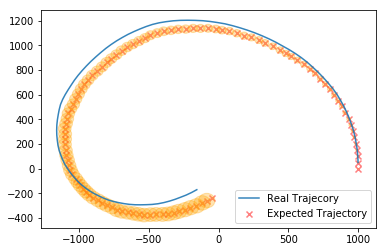

In [478]:
plt.plot(real_trajectory[:,0],
         real_trajectory[:,1], 
         label = 'Real Trajecory', alpha = 0.9)
plt.scatter(mus[:,0],
            mus[:,1], 
            marker='x', 
            color = 'red', 
            label = 'Expected Trajectory', alpha = 0.5)
for i in range(nsteps):
    #plot_ellipsis(mus[i,:2,None], sigmas[i,:2,:2], P = 0.95, color = 'orange', alpha=0.1)
    plot_cov_ellipse(sigmas[i,:2,:2], mus[i,:2], color = 'orange', alpha = 0.3)
plt.legend()

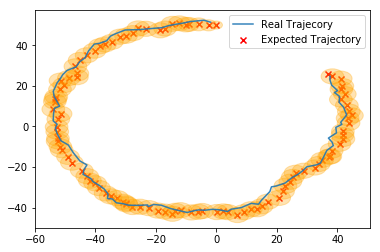

In [479]:
plt.plot(real_trajectory[:,2],
         real_trajectory[:,3], 
         label = 'Real Trajecory', alpha = 0.9)
plt.scatter(mus[:,2],
            mus[:,3], 
            marker='x', 
            color = 'red', 
            label = 'Expected Trajectory')
for i in range(nsteps):
    #plot_ellipsis(mus[i,:2,None], sigmas[i,:2,:2], P = 0.95, color = 'orange', alpha=0.1)
    plot_cov_ellipse(sigmas[i,2:,2:], mus[i,2:], color = 'orange', alpha = 0.3)
plt.legend()